In [21]:
# Dataset: https://www.kaggle.com/datasets/salader/dogs-vs-cats
# The problem with this model is, it makes mistakes when the picture is zoomed like face of cat or dog taken so closely.

import os
import numpy as np
import pandas as pd

BASE_DIR = '/kaggle/input/dogs-vs-cats'

In [22]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [23]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [24]:
# Normalize value 0 to 1

def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [25]:
# create CNN model

model = Sequential()

# convolutional model
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# Flatten layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_7 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [27]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 66s 101ms/step - loss: 2.2346 - accuracy: 0.5573 - val_loss: 0.6831 - val_accuracy: 0.5732
Epoch 2/10
625/625 [==============================] - 54s 85ms/step - loss: 0.6866 - accuracy: 0.5977 - val_loss: 0.6448 - val_accuracy: 0.6170
Epoch 3/10
625/625 [==============================] - 53s 85ms/step - loss: 0.6226 - accuracy: 0.6489 - val_loss: 0.6059 - val_accuracy: 0.6668
Epoch 4/10
625/625 [==============================] - 54s 85ms/step - loss: 0.5952 - accuracy: 0.6808 - val_loss: 0.5654 - val_accuracy: 0.7132
Epoch 5/10
625/625 [==============================] - 55s 87ms/step - loss: 0.5653 - accuracy: 0.7099 - val_loss: 0.8050 - val_accuracy: 0.6596
Epoch 6/10
625/625 [==============================] - 54s 87ms/step - loss: 0.5276 - accuracy: 0.7391 - val_loss: 0.5332 - val_accuracy: 0.7370
Epoch 7/10
625/625 [==============================] - 54s 87ms/step - loss: 0.5045 - accuracy: 0.7570 - val_loss: 0.5355 - val_accuracy

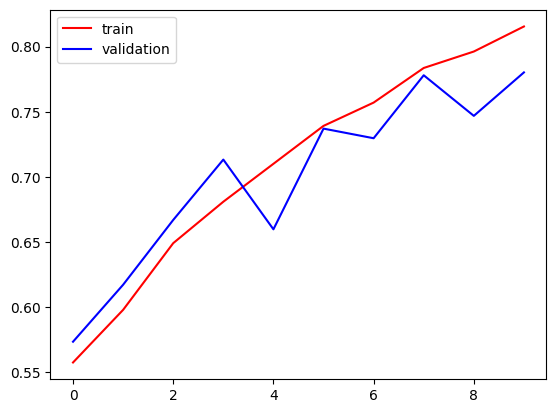

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

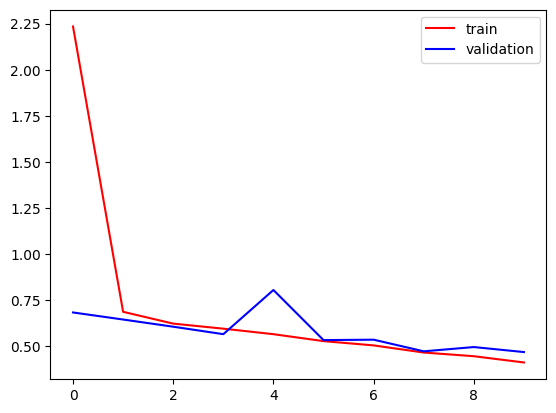

In [30]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [31]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

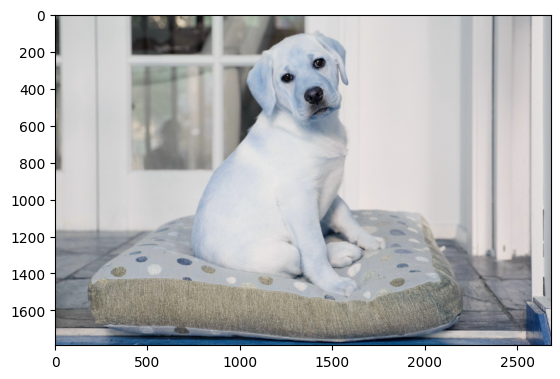

In [68]:
import cv2
test_img = cv2.imread('/kaggle/input/test-datas/dog2.jpg')
plt.imshow(test_img)

In [69]:
test_img.shape


(1789, 2684, 3)

In [70]:
test_img = cv2.resize(test_img,(256,256))

In [71]:

test_input = test_img.reshape((1,256,256,3))

In [79]:
predicted_val = model.predict(test_input)
predicted_val
# val 1 means dog
# val 0 means cat

1/1 [==============================] - 0s 47ms/step


array([[1.]], dtype=float32)

In [80]:
if predicted_val ==1:
    print("It's a dog")
else:
    print("It's a cat") 

It's a dog
